<a href="https://colab.research.google.com/github/The-Franklin-Saint-Scientist/The-Franklin-Saint-Scientist/blob/main/Retail_sales_Descriptive_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary libraries!


In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import or load dataset

In [94]:
ds = pd.read_csv('/content/drive/MyDrive/FILES/Retail sales(formated).csv')

Make a copy of dataset as a precaution

In [95]:
ds00 = ds.copy()

In [96]:
#preview of dataset by number of rows and columns
ds00.shape


(30000, 13)

In [97]:
# preview of dataset by the first five rows
ds00.head(5)

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Unit price(USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect,Year
0,Spearsland,52372247,01-01-22,9,2741.69,304.632222,20,81,Tanzania,Furniture,Saturday,False,2022
1,Spearsland,52372247,"2 January, 2022",7,2665.53,380.790000,0,0,Mauritania,Furniture,Sunday,False,2022
2,Spearsland,52372247,03-01-22,1,380.79,380.790000,0,0,Saint Pierre and Miquelon,Furniture,Monday,False,2022
3,Spearsland,52372247,04-01-22,4,1523.16,380.790000,0,0,Australia,Furniture,Tuesday,False,2022
4,Spearsland,52372247,05-01-22,2,761.58,380.790000,0,0,Swaziland,Furniture,Wednesday,False,2022


In [98]:
# summary of the statistical analysis of the dataset
ds00.describe()

,Product ID,Units Sold,Sales Revenue (USD),Unit price(USD),Discount Percentage,Marketing Spend (USD),Year
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.461294e+07,6.161967,2749.509593,436.411626,2.973833,49.944033,2022.501567
std,2.779759e+07,3.323929,2568.639288,284.513846,5.974530,64.401655,0.502732
min,3.636541e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000
25%,2.228600e+07,4.000000,882.592500,178.820000,0.000000,0.000000,2022.000000
50%,4.002449e+07,6.000000,1902.420000,392.283333,0.000000,1.000000,2023.000000
75%,6.559352e+07,8.000000,3863.920000,661.202500,0.000000,100.000000,2023.000000
max,9.628253e+07,56.000000,27165.880000,970.210000,20.000000,199.000000,2024.000000


What are the items being sold and how many of each item was sold?

In [99]:
Items_sold = ds00['Product Category'].value_counts()\
.reset_index()
Items_sold.columns = ['Product Category', 'No. of product sold']
Items_sold.index +=1
Items_sold

,Product Category,No. of product sold
1,Furniture,9503
2,Electronics,8041
3,Clothing,6608
4,Groceries,5848


Best Selling Product


In [139]:
Best_selling_product = ds00.groupby('Product Category') ['Sales Revenue (USD)'].sum()\
.reset_index()
Best_selling_product.columns = ['Product Category', 'Sales Revenue (USD)']
(Best_selling_product)

,Product Category,Sales Revenue (USD)
0,Clothing,19952024.73
1,Electronics,29414540.61
2,Furniture,22913105.64
3,Groceries,10205616.80


BAR-CHART COMPARING PRODUCTS AND THEIR REVENUE

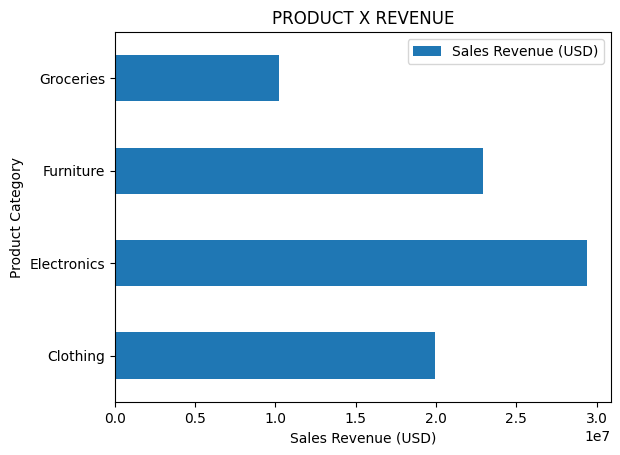

In [141]:

Best_selling_product.set_index('Product Category').plot(kind='barh')
plt.title('PRODUCT X REVENUE')
plt.xlabel('Sales Revenue (USD)')
plt.ylabel('Product Category')
plt.show()

Total amount of revenue for the three year period.

In [102]:
Total_revenue = ds00['Sales Revenue (USD)'].sum()
print("Total revenue for the three year period =",Total_revenue)

Total revenue for the three year period = 82485287.78


Total revenue for 2022, 2023 and 2024 respectively.

In [145]:
#2024 only includes the month of january

Total_Revenue = ds00.groupby('Year')['Sales Revenue (USD)'].sum()
(Total_Revenue)

,Sales Revenue (USD)
Year,
2022,41204926.90
2023,41199686.01
2024,80674.87


LINE CHART SHOWING REVENUE TREND FOR THE TIME PERIOD

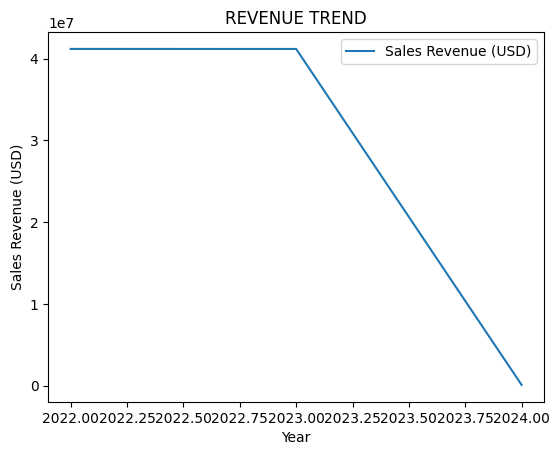

In [149]:

Total_Revenue = Total_Revenue.to_frame()

Total_Revenue = Total_Revenue.reset_index()

Total_Revenue.plot(x='Year', y='Sales Revenue (USD)', kind='line')
plt.title('REVENUE TREND')
plt.xlabel('Year')
plt.ylabel('Sales Revenue (USD)')
plt.show()

The average price of products.

In [155]:
Average_price = ds00.groupby('Product Category') ['Unit price(USD)'].mean()\
.reset_index()
Average_price.columns = ['Product Category', 'Average price']
Average_price.index +=1
(Average_price)

,Product Category,Average price
1,Clothing,509.325846
2,Electronics,514.858982
3,Furniture,383.919733
4,Groceries,331.455759


BAR-CHART SHOWING PRODUCT WITH RESPECT TO PRICE

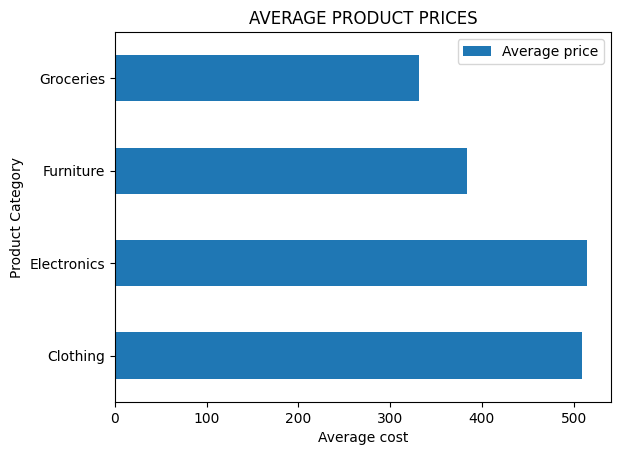

In [156]:
Average_price.set_index('Product Category').plot(kind='barh')
plt.title('AVERAGE PRODUCT PRICES')
plt.xlabel('Average cost')
plt.ylabel('Product Category')
plt.show()

Cost of marketing each product.

In [105]:
Cost_of_marketing = ds00.groupby('Product Category') ['Marketing Spend (USD)'].sum()\
.reset_index()
Cost_of_marketing.columns = ['Product Category', 'Cost of marketing(USD)']
Cost_of_marketing.index +=1
(Cost_of_marketing)

,Product Category,Cost of marketing(USD)
1,Clothing,326019
2,Electronics,405997
3,Furniture,471330
4,Groceries,294975


VISUALIZIING THE COST OF MARKETING EACH PRODUCT

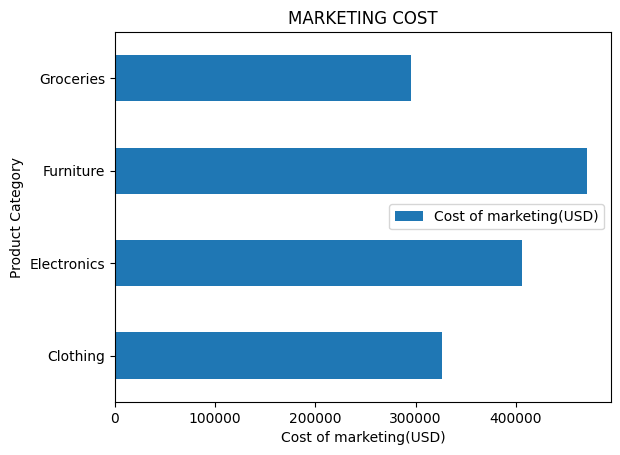

In [157]:
Cost_of_marketing.set_index('Product Category').plot(kind='barh')
plt.title('MARKETING COST')
plt.xlabel('Cost of marketing(USD)')
plt.ylabel('Product Category')
plt.show()

Countries the company sales outlet is located at amd their respective amount of revenues.

In [160]:
Countries = ds00.groupby('Store Location') ['Sales Revenue (USD)'].sum()\
.reset_index()
Countries.columns = ['Store Location', 'Sales Revenue (USD)']
Countries.index +=1


#Total number of countries is 234 but since the limit number of rows it can display is 50, i would be displaying 50 rows
Countries.head(50)

,Store Location,Sales Revenue (USD)
1,Afghanistan,329511.22
2,Albania,296929.47
3,Algeria,292690.46
4,American Samoa,308614.68
5,Andorra,199063.87
6,Angola,368388.18
7,Anguilla,452484.21
8,Antarctica (the territory South of 60 deg S),326473.86
9,Antigua and Barbuda,345521.43
10,Argentina,311769.96


Which country generated the most revenue?

In [107]:
country_with_highest_revenue = Countries.loc[Countries['Sales Revenue (USD)'].idxmax()]
country_with_highest_revenue

,50
Store Location,Congo
Sales Revenue (USD),644103.38


Which country returned the lowest revenue?

In [108]:
country_with_lowest_revenue = Countries.loc[Countries['Sales Revenue (USD)'].idxmin()]
country_with_lowest_revenue

,5
Store Location,Andorra
Sales Revenue (USD),199063.87


Cost of marketing in the respective countries.

In [109]:
marketing_cost = ds00.groupby('Store Location') ['Marketing Spend (USD)'].sum()\
.reset_index()
marketing_cost.columns = ['Store Location', 'Marketing Spend (USD)']
marketing_cost.index +=1
marketing_cost

,Store Location,Marketing Spend (USD)
1,Afghanistan,6455
2,Albania,4996
3,Algeria,5255
4,American Samoa,5469
5,Andorra,3848
...,...,...
239,Wallis and Futuna,7868
240,Western Sahara,6895
241,Yemen,7675
242,Zambia,6170


Which country had the highest marketing spend?

In [110]:
country_with_highest_marketing = marketing_cost.loc[marketing_cost['Marketing Spend (USD)'].idxmax()]
country_with_highest_marketing

,50
Store Location,Congo
Marketing Spend (USD),11387


Which country had the least marketing spend?

In [111]:
country_with_lowest_marketing = marketing_cost.loc[marketing_cost['Marketing Spend (USD)'].idxmin()]
country_with_lowest_marketing

,140
Store Location,Micronesia
Marketing Spend (USD),3514


Analysis on Congo as the best performing country.

In [126]:
congo_products = ds00[ds00['Store Location'] == 'Congo'].groupby('Product Category') ['Sales Revenue (USD)'].sum()\
.reset_index()

(congo_products)

,Product Category,Sales Revenue (USD)
0,Clothing,140063.89
1,Electronics,205594.35
2,Furniture,244888.16
3,Groceries,53556.98


 BAR-CHART FOR SALES REVENUE IN CONGO

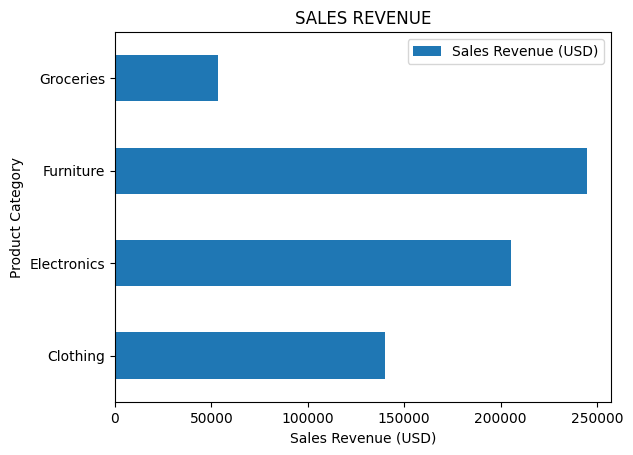

In [163]:
congo_products.set_index('Product Category').plot(kind='barh')
plt.title('SALES REVENUE')
plt.xlabel('Sales Revenue (USD)')
plt.ylabel('Product Category')
plt.show()

In [113]:
#the best selling product in congo
congo_products.loc[congo_products['Sales Revenue (USD)'].idxmax()]

,2
Product Category,Furniture
Sales Revenue (USD),244888.16


In [114]:
#the least selling product
congo_products.loc[congo_products['Sales Revenue (USD)'].idxmin()]

,3
Product Category,Groceries
Sales Revenue (USD),53556.98


Analysis on Andorra as least performing country

In [115]:
Andorra_products = ds00[ds00['Store Location'] == 'Congo'].groupby('Product Category') ['Sales Revenue (USD)'].sum()\
.reset_index()

Andorra_products

,Product Category,Sales Revenue (USD)
0,Clothing,140063.89
1,Electronics,205594.35
2,Furniture,244888.16
3,Groceries,53556.98


 BAR-CHART FOR SALES REVENUE IN ANDORRA

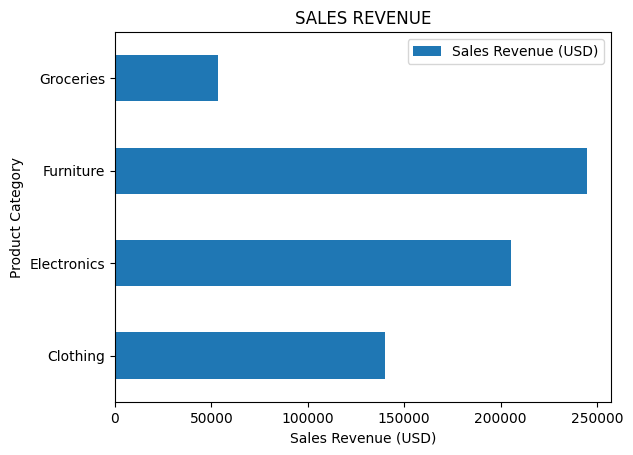

In [164]:
Andorra_products.set_index('Product Category').plot(kind='barh')
plt.title('SALES REVENUE')
plt.xlabel('Sales Revenue (USD)')
plt.ylabel('Product Category')
plt.show()

In [116]:
#the best selling product in Andorra
Andorra_products.loc[congo_products['Sales Revenue (USD)'].idxmax()]



,2
Product Category,Furniture
Sales Revenue (USD),244888.16


In [117]:
#the least selling product in Andorra
Andorra_products.loc[congo_products['Sales Revenue (USD)'].idxmin()]



,3
Product Category,Groceries
Sales Revenue (USD),53556.98
